In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from utils.udp_util import extract_udp_prague_to_dataframe
from utils.plotter import  plot_siftr_graph

In [2]:
utf = extract_udp_prague_to_dataframe("../data/udp_net_2025-05-12-10-37-50/udp_prague_receiver_iperf3_d120.json")

In [3]:
utf

,Time,Rcvd_Mbps,Sent_Mbps,RTT_ms,Mark_pct,Mark_Marked,Mark_Total,Lost_pct,Lost_Lost,Lost_Total
0,0.00,0.001,0.000,0.000,0.0,0,1,0.00,0,1
1,1.50,0.756,0.012,14.765,0.0,0,102,0.98,1,102
2,2.83,0.008,0.000,2348.465,0.0,0,1,0.00,0,1
3,5.68,0.039,0.001,1341.689,0.0,0,10,0.00,0,10
4,7.73,0.005,0.000,4793.427,0.0,0,1,0.00,0,1
...,...,...,...,...,...,...,...,...,...,...
71,115.70,0.209,0.003,2057.805,0.0,0,31,0.00,0,31
72,117.11,0.008,0.000,2319.969,0.0,0,1,0.00,0,1
73,118.20,0.154,0.002,2221.487,0.0,0,15,40.00,6,15
74,120.05,0.091,0.001,657.253,0.0,0,15,53.33,8,15


In [4]:
import json
import numpy as np
import pandas as pd

def extract_data_df(filename):
    with open(filename) as f:
        data = json.load(f)

    records = []

    for interval in data['intervals']:
        record = {
            'time': interval['sum']['start'],
            'bitrate_mbps': interval['sum']['bits_per_second'] / 1_000_000
        }

        stream = interval['streams'][0]
        if 'rtt' in stream:
            record['rtt_time'] = stream['start']
            record['rtt_ms'] = stream['rtt'] / 1000.0  # µs to ms
        else:
            record['rtt_time'] = None
            record['rtt_ms'] = None

        records.append(record)

    df = pd.DataFrame(records)
    return df


In [5]:



# Function to extract data from iperf3 JSON
def extract_data(filename):
    with open(filename) as f:
        data = json.load(f)

    times = []
    bitrates = []
    rtt_times = []
    rtts = []

    for interval in data['intervals']:
        times.append(interval['sum']['start'])
        bitrates.append(interval['sum']['bits_per_second'] / 1_000_000)  # Convert to Mbit/s

        stream = interval['streams'][0]
        if 'rtt' in stream:
            rtt_times.append(stream['start'])
            rtts.append(stream['rtt'] / 1000.0)  # µs to ms

    return np.array(times), np.array(bitrates), np.array(rtt_times), np.array(rtts)



# File paths
file_cubic = '../data/udp_net_2025-05-12-10-37-50/iperf3_server_cubic_iperf3_d120.json'
file_cubic = '../data/udp_net_2025-05-12-10-37-50/iperf3_client_cubic_iperf3_d120.json'


import os
os.path.exists(file_cubic)

# Extract data
t_cubic, b_cubic, rt_cubic, rtt_cubic = extract_data(file_cubic)

In [6]:
tfcubic = extract_data_df(file_cubic)

In [7]:
tfcubic.describe()

,time,bitrate_mbps,rtt_time,rtt_ms
count,120.000000,120.000000,120.000000,120.000000
mean,59.500934,33.230191,59.500934,2487.972858
std,34.784985,155.283089,34.784985,1477.522802
min,0.000000,0.000000,0.000000,2.729000
25%,29.750593,0.000000,29.750593,1314.990000
50%,59.501092,0.000000,59.501092,2299.911000
75%,89.251097,10.488602,89.251097,3497.266500
max,119.000214,1374.958608,119.000214,6514.951000


In [8]:
utf.rename(columns={'RTT_ms': 'SmoothedRTT'}, inplace=True)
tfcubic.rename(columns={'rtt_ms': 'SmoothedRTT'}, inplace=True)


utf.rename(columns={'time': 'Time'}, inplace=True)
tfcubic.rename(columns={'time': 'Time'}, inplace=True)

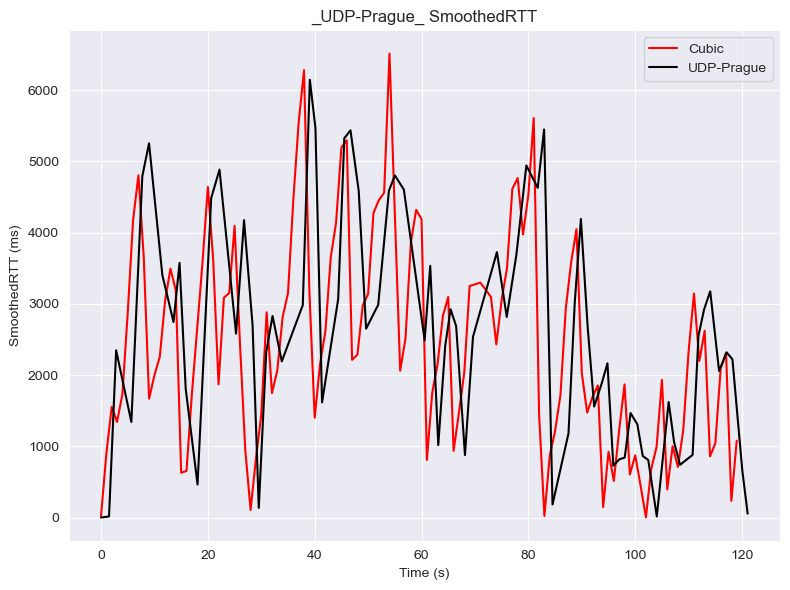

In [9]:
    # Define paths
paths = {
    "Cubic": tfcubic,
    "UDP-Prague": utf
}



scenario = str("_" + "UDP-Prague" + "_")

plot_siftr_graph(paths=paths,
                ycolumn="SmoothedRTT",
                title=f"{scenario} SmoothedRTT",
                xlabel="Time (s)",
                ylabel="SmoothedRTT (ms)",
                filename=f'{scenario}_SmoothedRTT',
                graph_directory="./",
)